编写Python代码，同时实现预测结果与真实数据的对比图，以及计算累计误差，从而全面地评估预测效果

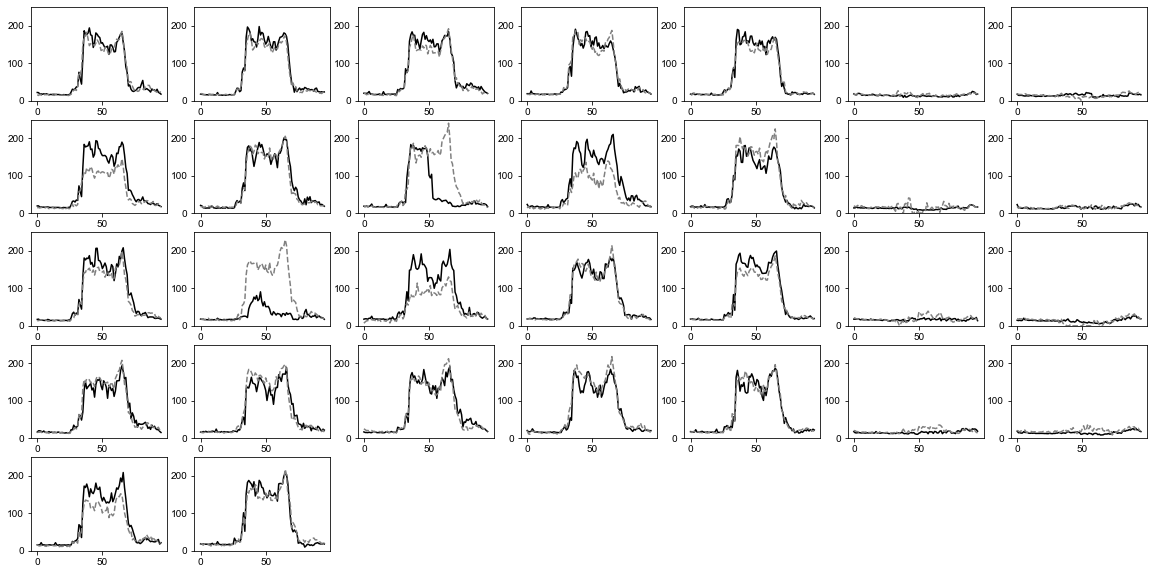

Evaluation on test data: accuracy = 77.78% 



In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
import numpy as np

with open('data/Y_test.pkl', 'rb') as f:
    Y_test = pickle.load(f)

with open('data/t0_ptp.pkl', 'rb') as f:
    t0_ptp = pickle.load(f)

with open('data/t0_min.pkl', 'rb') as f:
    t0_min = pickle.load(f)
    
with open('data/preddf.pkl', 'rb') as f:
    preddf = pickle.load(f)

    
realdf = Y_test*t0_ptp[0:96]+t0_min[0:96]
base = 0
error = 0
plt.figure(figsize=(20, 10))
for index in range(0, 30):
    real_array = realdf[index][0:96]
    pred_array = preddf[index][0:96]
    pred_array[np.where(pred_array < 0)] = 0
    plt.subplot(5, 7, index + 1)
    plt.plot(range(96), real_array, '-', label="real",c='black')
    plt.plot(range(96), pred_array, '--', label="pred",c='gray')
    plt.ylim(0, 250)
    base = base + np.sum(real_array)
    error = error + np.sum(np.abs(real_array-pred_array))
plt.show()
v = 100*(1-error/base)
print("Evaluation on test data: accuracy = %0.2f%% \n" % v)
# Evaluation on test data: accuracy = 74.95% 